# 1. Model : Decision Tree

In [41]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 트리 시각화를 위한 패키지를 로드
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

## 1.1 Load dataset

In [42]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [43]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [45]:
df = pd.DataFrame(data=iris["data"], columns=iris["feature_names"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
df["label"] = iris["target"]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 1.2 Preprocessing

In [47]:
# x, y 생성
cols = list(df.columns[2:4])
x = df.loc[:, cols]
y = df["label"]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=64)

## 1.3 BaseLine Modeling

In [49]:
# model 생성
dt_model = tree.DecisionTreeClassifier(random_state=64)

# model 학습
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=64)

## 1.4 Model Validation

In [50]:
y_pred = dt_model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9555555555555556


In [51]:
from sklearn.metrics import classification_report
print(iris["target_names"])
print(classification_report(y_test, y_pred))

['setosa' 'versicolor' 'virginica']
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.89      0.94        19
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## 1.5 Learning Visualization

In [52]:
# export_graphviz ==> dot format에 string data를 리턴
dot_data = export_graphviz(dt_model,
                            feature_names=cols,
                            class_names=iris["target_names"])

dot_data

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="petal length (cm) <= 2.45\\ngini = 0.664\\nsamples = 105\\nvalue = [36, 31, 38]\\nclass = virginica"] ;\n1 [label="gini = 0.0\\nsamples = 36\\nvalue = [36, 0, 0]\\nclass = setosa"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="petal width (cm) <= 1.75\\ngini = 0.495\\nsamples = 69\\nvalue = [0, 31, 38]\\nclass = virginica"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="petal length (cm) <= 4.95\\ngini = 0.161\\nsamples = 34\\nvalue = [0, 31, 3]\\nclass = versicolor"] ;\n2 -> 3 ;\n4 [label="petal width (cm) <= 1.65\\ngini = 0.062\\nsamples = 31\\nvalue = [0, 30, 1]\\nclass = versicolor"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 30\\nvalue = [0, 30, 0]\\nclass = versicolor"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]\\nclass = virginica"] ;\n4 -> 6 ;\n7 [label="petal width (cm) <= 1.6\\ngini = 0.444

In [53]:
# .dot file ==> 그래프로 로드하는 함수 pydotplus module에 존재
graph = pydotplus.graph_from_dot_data(dot_data)


In [54]:
# GraphViz 실행 파일 찾기
print(pydotplus.find_graphviz())

{'dot': 'C:\\Program Files\\Graphviz\\bin\\dot.exe', 'twopi': 'C:\\Program Files\\Graphviz\\bin\\twopi.exe', 'neato': 'C:\\Program Files\\Graphviz\\bin\\neato.exe', 'circo': 'C:\\Program Files\\Graphviz\\bin\\circo.exe', 'fdp': 'C:\\Program Files\\Graphviz\\bin\\fdp.exe', 'sfdp': 'C:\\Program Files\\Graphviz\\bin\\sfdp.exe'}


In [55]:
import os
from graphviz import Digraph

# GraphViz 실행 파일 경로 설정
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"

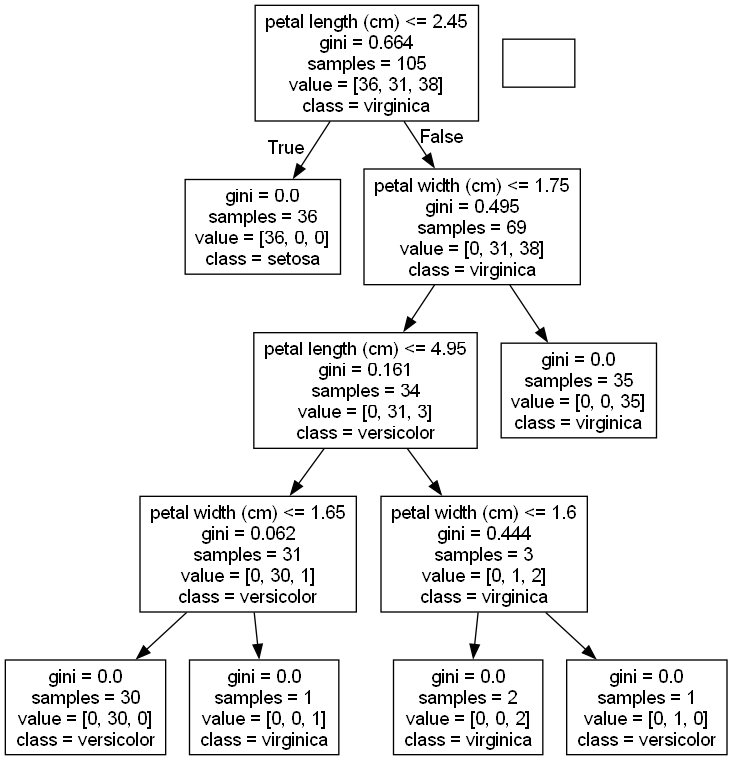

In [56]:
# graph ==> Image Object로 생성
Image(graph.create_png())

## 1.6 Scaling 적용 전 적용 후 비교

In [61]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=64)

# model 생성
dt_model = tree.DecisionTreeClassifier(random_state=64)

# model 학습
dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score

predict_proba = dt_model.predict_proba(x_test)
# pr_n, pr_p = predict_proba[:,0], predict_proba[:,1]
# print("probability of positive :", pr_p)
roc_score = roc_auc_score(y_test, predict_proba, multi_class='ovo')
print("auc score :", roc_score)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.89      0.94        19
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

auc score : 0.9736842105263159


## 1.7 Hyper Parm. (Model) tuning

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=64)

tun_param = {
    "1":{
        "max_depth":5,
        "max_leaf_nodes":4},
    "2":{
        "max_depth":4,
        "max_leaf_nodes":4},
    "3":{
        "max_depth":3,
        "max_leaf_nodes":4},
    "4":{
        "max_depth":2,
        "max_leaf_nodes":4},
    "5":{
        "max_depth":1,
        "max_leaf_nodes":4}
}

for key in tun_param.keys():
    param_1 = tun_param[key]["max_depth"]
    param_2 = tun_param[key]["max_leaf_nodes"]

    # model 생성
    dt_model = tree.DecisionTreeClassifier(random_state=64,
                                        criterion='entropy',
                                        max_depth=param_1,
                                        max_leaf_nodes=param_2)

    # model 학습
    dt_model.fit(x_train, y_train)

    y_pred = dt_model.predict(x_test)
    print(classification_report(y_test, y_pred))

    from sklearn.metrics import roc_auc_score

    predict_proba = dt_model.predict_proba(x_test)
    # pr_n, pr_p = predict_proba[:,0], predict_proba[:,1]
    # print("probability of positive :", pr_p)
    roc_score = roc_auc_score(y_test, predict_proba, multi_class='ovo')
    print("auc score :", roc_score)

    print("feature importance:", dt_model.feature_importances_)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.89      0.94        19
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

auc score : 0.9839181286549707
feature importance: [0.65646907 0.34353093]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.89      0.94        19
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

auc score : 0.9839181286549707
feature importance: [0.65646907 0.34353093]
              precision    recall  f1-score   support

           0       1.00      1.00

In [64]:
dt_model.get_n_leaves()

np.int64(4)

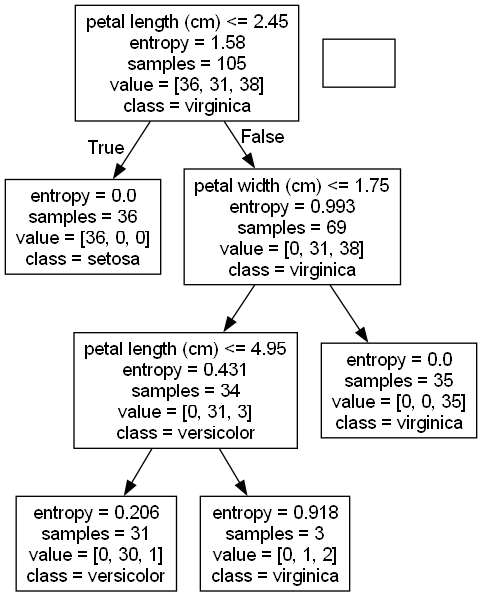

In [66]:
dot_data2 = export_graphviz(dt_model,
                            feature_names=cols,
                            class_names=iris["target_names"])

dot_data2

graph2 = pydotplus.graph_from_dot_data(dot_data2)

Image(graph2.create_png())

# 2. 앙상블 메커니즘

## 2.1 Voting 매커니즘


### 2.1.1 Import Lib & Load dataset

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#앙상블 Lib
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier  #KNN

In [6]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [8]:
cancer["target_names"], cancer["target"]

(array(['malignant', 'benign'], dtype='<U9'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0

### 2.1.2 preprocessing

In [9]:
x = cancer["data"]
y = cancer["target"]
x.shape, y.shape, type(x), type(y)

((569, 30), (569,), numpy.ndarray, numpy.ndarray)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=27)

In [11]:
x_train.shape, x_test.shape

((398, 30), (171, 30))

### 2.1.3 Model 생성

In [55]:
lr = LogisticRegression(random_state=27, max_iter=5000)
lr

LogisticRegression(max_iter=5000, random_state=27)

In [56]:
dt = DecisionTreeClassifier(random_state=27, max_depth=5)
dt

DecisionTreeClassifier(max_depth=5, random_state=27)

In [57]:
knn = KNeighborsClassifier(n_neighbors=8)
knn

KNeighborsClassifier(n_neighbors=8)

### 2.1.4 Voting 매커니즘 이용하기

In [58]:
voting = VotingClassifier([("LR",lr), ("DT",dt), ("KNN",knn)], voting="soft")
voting

VotingClassifier(estimators=[('LR',
                              LogisticRegression(max_iter=5000,
                                                 random_state=27)),
                             ('DT',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=27)),
                             ('KNN', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [59]:
# 학습
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(max_iter=5000,
                                                 random_state=27)),
                             ('DT',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=27)),
                             ('KNN', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [60]:
# 예측
y_pred = voting.predict(x_test)

In [61]:
# 검증
accuracy_score(y_test, y_pred)

0.9415204678362573

In [62]:
y_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0])

## 2.2 Bagging : RandomForest
### 2.2.1 import Lib

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier(random_state=27, max_depth=5)
rf

RandomForestClassifier(max_depth=5, random_state=27)

In [65]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=27)

In [66]:
y_pred = rf.predict(x_test)


In [67]:
accuracy_score(y_test, y_pred)

0.9590643274853801

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [69]:
f_imp = pd.Series(rf.feature_importances_, index=cancer["feature_names"])
f_imp = f_imp.sort_values(ascending=False)

<Axes: xlabel='None', ylabel='None'>

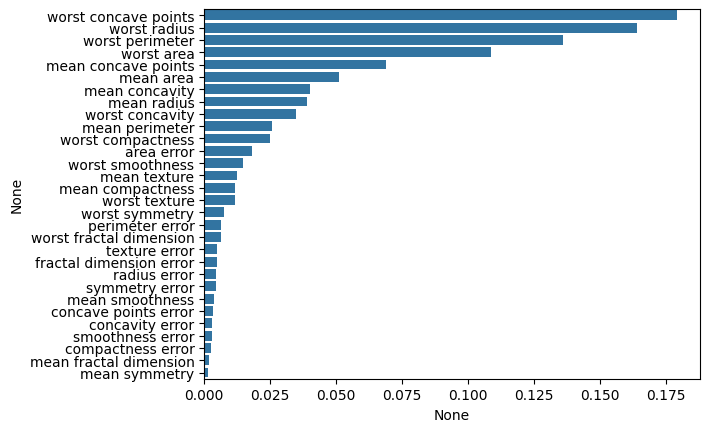

In [70]:
sns.barplot(x=f_imp, y=f_imp.index)

## 2.3 Boosting : XGBClassfier

In [1]:
#1. pip install xgboost
#2. version 확인
import xgboost, sklearn
xgboost.__version__, sklearn.__version__

('2.1.3', '1.5.2')

In [ ]:
#xgboost와 sklearn 호환성이 안맞아서, sklearn 버전이 높으면 다운그레이드
#가상환경에서 sklearn을 1.5.2 version으로 다운그레이드
#pip install scikit-learn==1.5.2
#버전 재확인 (안되면 -> 껐다 키면됨됨)

In [23]:
from xgboost.sklearn import XGBRFClassifier

In [24]:
xgb = XGBRFClassifier(
    n_estimators = 50,
    max_depth = 5,
    importance_type = "gain",
    random_state = 27)
xgb

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type='gain',
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=5, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=50, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=27, reg_alpha=None, ...)

In [37]:
df = pd.DataFrame(data=cancer["data"], columns=cancer["feature_names"])
df["y"] = cancer["target"]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [41]:
cols = list(df.columns[:-1])

x = df.loc[:, cols]
y = df["y"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=27)


In [42]:
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)


In [43]:
accuracy_score(y_test, y_pred)

0.9532163742690059

In [44]:
from xgboost import plot_importance

In [45]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [46]:
# y에 영향을 미치는 변수에 대해서 확인
xgb.get_booster().get_fscore()

{'mean radius': 19.0,
 'mean texture': 59.0,
 'mean perimeter': 1.0,
 'mean smoothness': 6.0,
 'mean compactness': 2.0,
 'mean concavity': 19.0,
 'mean concave points': 8.0,
 'mean symmetry': 8.0,
 'mean fractal dimension': 1.0,
 'radius error': 8.0,
 'texture error': 2.0,
 'perimeter error': 4.0,
 'area error': 31.0,
 'compactness error': 7.0,
 'concavity error': 2.0,
 'concave points error': 2.0,
 'symmetry error': 1.0,
 'fractal dimension error': 4.0,
 'worst radius': 32.0,
 'worst texture': 56.0,
 'worst perimeter': 40.0,
 'worst area': 11.0,
 'worst smoothness': 1.0,
 'worst compactness': 11.0,
 'worst concavity': 10.0,
 'worst concave points': 67.0,
 'worst symmetry': 4.0,
 'worst fractal dimension': 3.0}

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

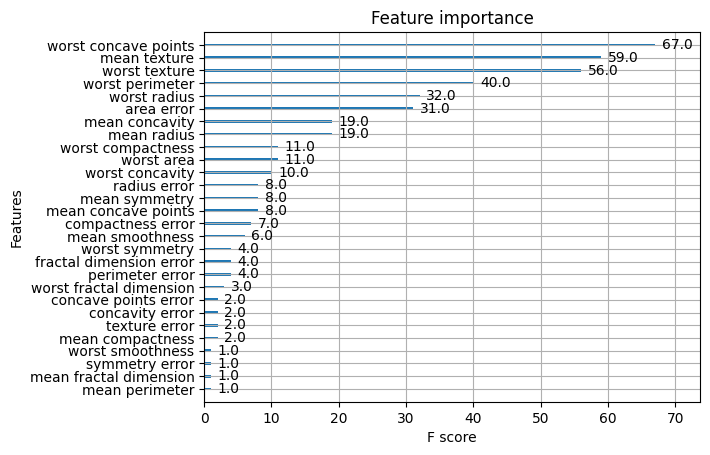

In [49]:
plot_importance(xgb)

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.95      0.97      0.96       104

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

